In [1]:
from typing import TypedDict, Tuple, List
from jaxtyping import Float, Int
from numpy import ndarray as Array
from policy.utils.io import load_gzip_file, save_gzip_file

class Demonstration(TypedDict):
    """Demonstration data structure."""
    states: List[Tuple[Array, ...]]
    actions: List[Float[Array, "1 26"]]
    images: List # can be ignored, empty for demos

def load_demo(demo_path: str) -> Demonstration:
    """Load a demonstration from a file."""
    return load_gzip_file(demo_path)


In [3]:
from mpm import ASSETS_DIR
import os
import glob
import tqdm

# Load the demonstration data
env_name = "flip"


demo_dir = f"/home/sizheli/project/dexdeform_clean/data/demos/{env_name}"
demo_files = glob.glob(os.path.join(demo_dir, "*.pkl"))

demo_filename = demo_files[5]

demo_data: Demonstration
demo_data = load_demo(demo_filename)

In [4]:
from mpm import make

env = make(env_name=env_name, sim_cfg={'max_steps': 4400})
init_state = env.init_state


LOADING....
Loaded with 0.0008196830749511719 secs.
Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
{'h': 0.003, 'r': 0.1, 'init_pos': (0.5, 0.38, 0.6)}
GPU 0/8 memory: free=39.079, total=47.536
init renderer


using object-centric view


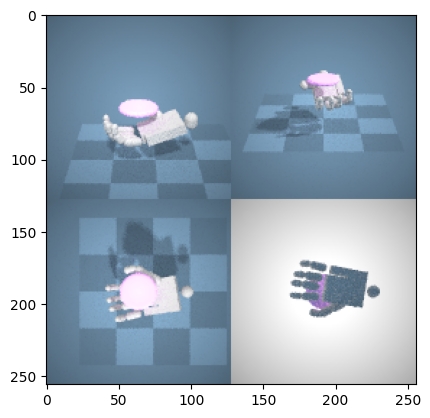

In [5]:
import matplotlib.pyplot as plt
from mpm.viewer import Viewer
vis = Viewer(env)
vis.refresh_views("obj_centric")
vis.set_view("side")
img = vis.render_state_multiview(spp=10, n_views=4)
plt.imshow(img)
plt.show()

In [ ]:
"""
[First Four Elements (ref: https://arxiv.org/pdf/1810.01054.pdf)]

(0) x: positions of all material points, shape (N, 3)
(1) v: velocities of all material points, shape (N, 3)
(2) F: defomration gradient of all material points, shape (N, 3, 3)
(3) C: Affine velocity field, shape (N, 3, 3)

(4-22): Rigid body poses for the 19 primitive shapes. 
Each pose is stored as position (3,) + quaternion rotation (4,)  
...
...
...

(23): base pose of the shadow hand; shape (n_hand, 4, 4)
(24): joint positions of the shadow hand; shape (n_hand, 24)

"""

  1%|          | 2/300 [00:00<00:27, 10.75it/s]

100%|██████████| 300/300 [00:28<00:00, 10.60it/s]


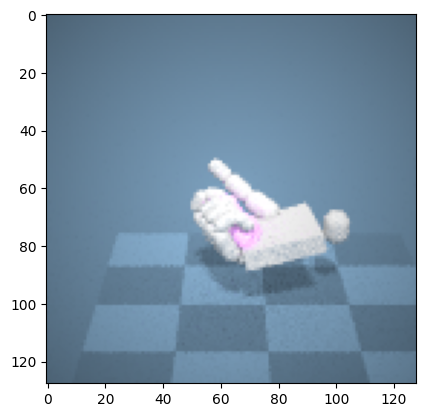

In [6]:
import tqdm
import numpy as np

vis.set_view("side")
demo_init_state = demo_data["states"][0]
env.simulator.set_state(0, demo_init_state)


num_actions = len(demo_data["actions"])

images = []
for i in tqdm.trange(num_actions):
    action = demo_data["actions"][i]

    env.simulator.step(action)
    images.append(vis.render())

plt.imshow(images[-1])
plt.show()

In [7]:
from mpm.video_utils import write_video
write_video(images, filename="tmp1.gif", _return=True) # TODO: set your output file name

animating tmp1.gif


MoviePy - Building file tmp1.gif with imageio.
